In [5]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:

df= pd.read_csv('../linear regression from scratch - realEstate project/kc_house_data.csv')

In [7]:
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [9]:
# Drop the id and date columns
df = df.drop(['id', 'date'], axis=1)

In [10]:
# Display the number of data observations
len(df)

21613

In [11]:
len(df.columns)

19

In [12]:
# Check the types of data
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
# Display the number of null data observations
df.isnull().values.sum()

2

In [14]:
# Specify target and features
target = df.iloc[:, 0].name 
features = df.iloc[:, 1:].columns.tolist()
target



'price'

In [15]:
target

'price'

In [16]:
# Correlations of features with target variable
correlations = df.corr()
correlations[target]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [17]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = df.corr()[df.corr() <0.01]
removed_features.fillna('+')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,+,+,+,+,+,+,+,+,+,+,+,+,+,+,-0.053203,+,+,+,+
bedrooms,+,+,+,+,+,+,-0.006582,+,+,+,+,+,+,+,-0.152668,-0.008931,+,+,+
bathrooms,+,+,+,+,+,+,+,+,-0.124982,+,+,+,+,+,-0.203866,+,+,+,+
sqft_living,+,+,+,+,+,+,+,+,-0.058753,+,+,+,+,+,-0.19943,+,+,+,+
sqft_lot,+,+,+,+,+,-0.005201,+,+,-0.008958,+,+,+,+,0.007644,-0.129574,-0.085683,+,+,+
floors,+,+,+,+,-0.005201,+,+,+,-0.263768,+,+,-0.245705,+,0.006338,-0.059121,+,+,+,-0.011269
waterfront,+,-0.006582,+,+,+,+,+,+,+,+,+,+,-0.026161,+,+,-0.014274,-0.04191,+,+
view,+,+,+,+,+,+,+,+,+,+,+,+,-0.05344,+,+,0.006157,-0.0784,+,+
condition,+,+,-0.124982,-0.058753,-0.008958,-0.263768,+,+,+,-0.144674,-0.158206,+,-0.361417,-0.060618,0.003026,-0.014941,-0.1065,-0.092824,-0.003406
grade,+,+,+,+,+,+,+,+,-0.144674,+,+,+,+,+,-0.184862,+,+,+,+


In [18]:
# Remove features with correlation < 0.2
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long',
              'sqft_lot15'], axis=1)

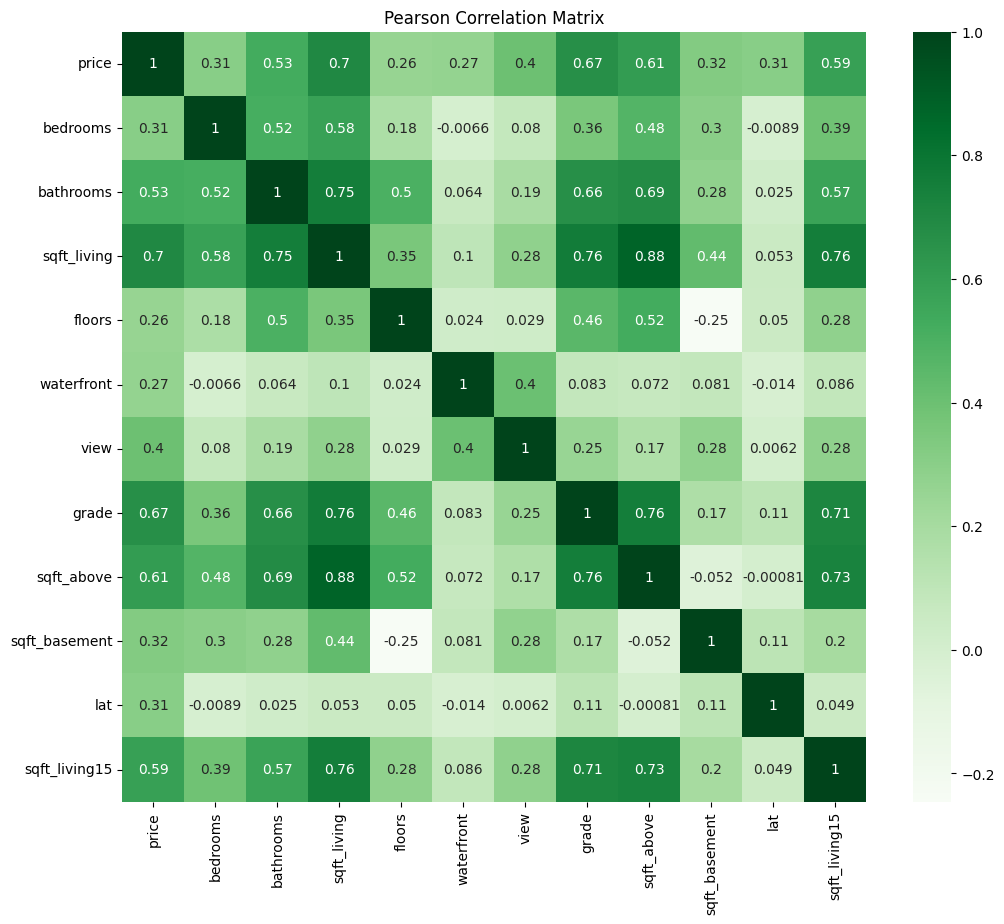

In [19]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 10})
plt.title('Pearson Correlation Matrix')
plt.show()

In [20]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876644,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755924,-,-,-
sqft_above,-,-,-,0.876644,-,-,-,0.755924,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [21]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [22]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_basement',
 'lat']

#### >> Saving the Df in a csv file:

In [25]:
import os  
os.makedirs('.', exist_ok=True)  
df.to_csv('out1.csv')  

In [21]:
# Normalize the features
df.iloc[:, 1:] = (df - df.mean())/df.std()

In [22]:
# Create X, y and theta
X = df.iloc[:1001, 1:]
# Création de la matrice X, inclut la colonne des uns pour le Biais
X = np.hstack((X, np.ones((X.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)
print(X.shape)
print(X[:10])

(1001, 10)
[[-0.86669728 -0.39872792 -1.44743008 -0.97981235 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.00568779 -0.39872792  0.17560263  0.53362199  0.93648411 -0.08717061
  -0.30575239 -0.55882282  0.24513573  1.        ]
 [-0.98082666 -1.47392526 -1.44743008 -1.42622105 -0.91540583 -0.08717061
  -0.30575239 -1.4095545  -0.6586658   1.        ]
 [ 0.17408642  0.67646941  1.14942226 -0.13054704 -0.91540583 -0.08717061
  -0.30575239 -0.55882282  1.39748267  1.        ]
 [-0.08195563 -0.39872792 -0.14900391 -0.43541151 -0.91540583 -0.08717061
  -0.30575239  0.29190886 -0.6586658   1.        ]
 [ 1.86559826  0.67646941  3.09706152  3.63670681 -0.91540583 -0.08717061
  -0.30575239  2.84410389  2.79837504  1.        ]
 [-0.76972816 -0.39872792  0.17560263 -0.39730345  0.93648411 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1.        ]
 [-0.67616386 -0.39872792 -0.798217   -1.11046856 -0.91540583 -0.08717061
  -0.30575239 -0.55882282 -0.6586658   1

In [23]:
y = df.iloc[:, 0].values
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
np.random.seed(0)
theta = np.random.randn(10, 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ]])

In [24]:
print(X.shape)
print(y.shape)
print(theta.shape)

(1001, 10)
(21613,)
(10, 1)


In [25]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

In [26]:
def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [27]:
cost_function(X, y, theta)

213448913507393.06

In [28]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [29]:
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [45]:
# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [47]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[ -2366.99391809,  -5740.18161456,  -1919.86780458, ...,
         -4289.9670155 ,  -4267.54668222,  -3467.2016103 ],
       [  -586.71782964,  -1422.33064799,   -475.95485245, ...,
         -1063.08058028,  -1057.52657038,   -859.26348472],
       [ -4367.38035834, -10589.00627164,  -3542.68524361, ...,
         -7914.17950799,  -7872.82665749,  -6396.64208457],
       ...,
       [ -1214.95597128,  -2944.2789382 ,   -985.7290421 , ...,
         -2200.80136186,  -2189.30719054,  -1778.99645812],
       [  1449.54429798,   3514.94786354,   1175.76888072, ...,
          2626.98114682,   2613.25317184,   2123.20170896],
       [ 68518.29939934, 166123.16318046,  55580.48290953, ...,
        124160.48243705, 123511.73894194, 100353.35620362]])

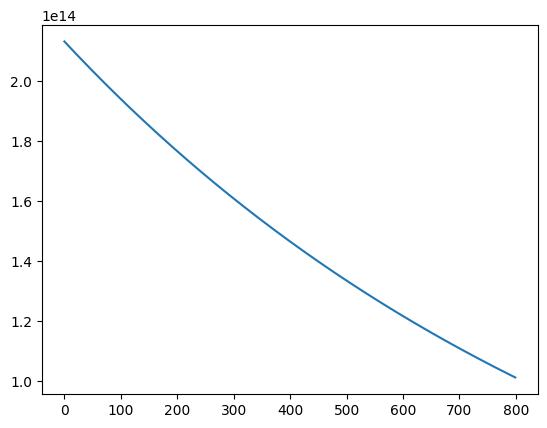

In [48]:
# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [41]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [42]:
coef_determination(y, predictions)

-2880.8381312144147

In [38]:
str(predictions[0].round(2))

'[227559.58]'

In [40]:
str(y[0].round(2))

'[221900.]'